# AIRCRAFT RISK ANALYSIS PROJECT
Our company is expanding into aviation. 
We need to identify which aircraft models present the lowest risk based on historical data.
This project will involve loading the dataset, cleaning it, analyzing patterns, and recommending the safest aircraft to purchase.

# Importing necessary Python libraries
We will use pandas for data manipulation,Numpy to work with arrays and matplotlib and seaborn for visualization.


In [1]:
#importing pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the AviationData.csv Dataset
We load the dataset using pandas. Since it is not encoded in UTF-8, we specify 'latin1' encoding, to stop the errors that appear when i dont change the encoding.


In [2]:
#importing the aviation dataset
df = pd.read_csv("AviationData.csv", encoding='latin1')

# Show the first few rows
df.head()

C:\Users\RITCHIE\AppData\Local\Temp\ipykernel_13620\4231158942.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# Exploring the Dataset
We will check the data types, missing values, and basic statistical summaries to understand the dataset structure.


In [3]:
# Basic dataset info
df.info()

# Descriptive statistics
df.describe()

# Check missing values
df.isnull().sum()

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Data Cleaning
We will remove duplicate rows and handle any missing values.


In [4]:
# Drop duplicate rows
df = df.drop_duplicates()


# Exploratory Data Analysis (EDA)

In this stage, we explore important patterns related to aircraft incidents.

First, we visualize the top 10 aircraft models involved in the highest number of incidents. 

Then we visualize the Top 10 most frequent injury severity types in incidents.
This helps us understand the typical seriousness of aviation accidents.

This helps identify high-risk aircraft and the typical severity of aviation accidents.


In [5]:
# Check actual column names
print(df.columns.tolist())


['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


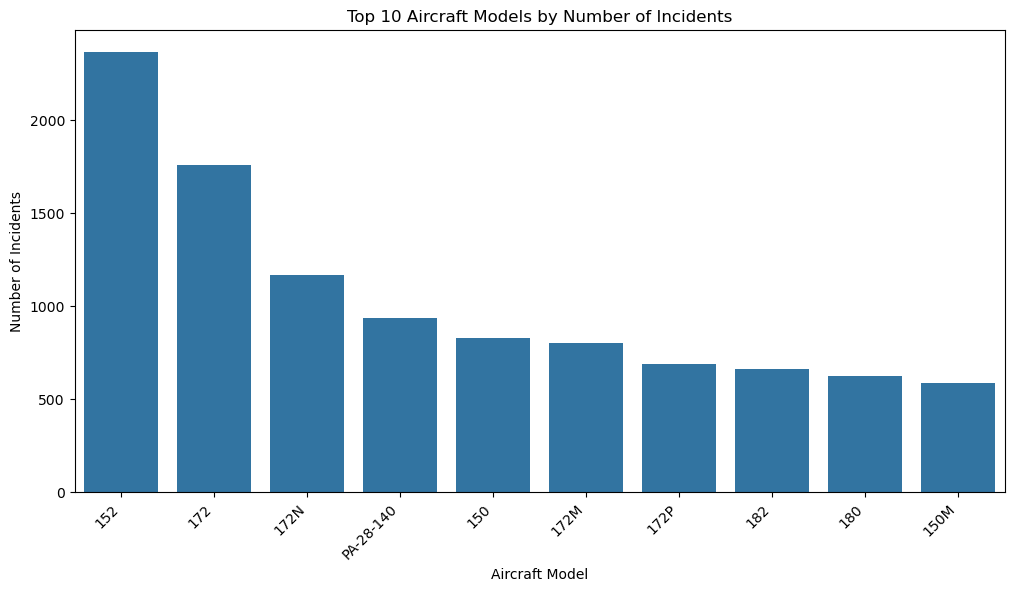

In [6]:
# Plot: Top 10 Aircraft Models by Number of Incidents
top_models = df['Model'].value_counts().head(10).index
top_df = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_df, x='Model', order=top_models)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Aircraft Models by Number of Incidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Incidents')
plt.show()




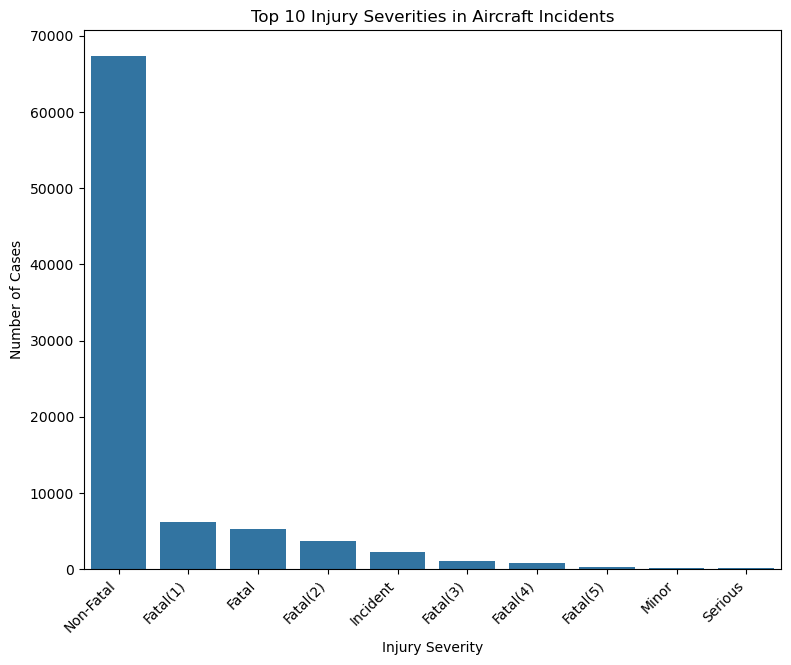

In [7]:
# Get Top 10 Injury Severity categories
top_severity = df['Injury.Severity'].value_counts().head(10).index
top_severity_df = df[df['Injury.Severity'].isin(top_severity)]

# Plot Top 10 Injury Severities
plt.figure(figsize=(9,7))
sns.countplot(data=top_severity_df, x='Injury.Severity', order=top_severity)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Injury Severities in Aircraft Incidents')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Cases')
plt.show()


# Creating a Risk Score
We will create a new column called 'Risk_Score' based on incident count and accident severity to rank the aircraft models.


In [8]:
print(df.columns)


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [9]:
df['Risk_Score'] = (
    df['Total.Fatal.Injuries'].fillna(0) * 3 +
    df['Total.Serious.Injuries'].fillna(0) * 2 +
    df['Total.Minor.Injuries'].fillna(0) * 1
)


In [10]:
df_sorted = df.sort_values(by='Risk_Score')


# Final Recommendations
We will list the top 5 safest aircraft models based on the lowest calculated risk scores.


In [11]:
# Filling missing injury numbers with 0
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)

# Calculating Risk Score
df['Risk_Score'] = (
    df['Total.Fatal.Injuries'] * 3 +
    df['Total.Serious.Injuries'] * 2 +
    df['Total.Minor.Injuries'] * 1
)

# Grouping by Aircraft Model and take the average Risk Score
model_risk = df.groupby('Model')['Risk_Score'].mean()

# Sorting models by lowest Risk Score
safest_models = model_risk.sort_values().head(5)

# Displaying the top 5 safest aircraft models
print(safest_models)


Model
&GCBC            0.0
G1159B           0.0
G10Z ASTIR CS    0.0
G109             0.0
G103C            0.0
Name: Risk_Score, dtype: float64


In [12]:
safest_models_df = safest_models.reset_index()
print(safest_models_df)


           Model  Risk_Score
0          &GCBC         0.0
1         G1159B         0.0
2  G10Z ASTIR CS         0.0
3           G109         0.0
4          G103C         0.0


# Conclusion
Based on our risk analysis, we recommend the identified aircraft models as the safest options.
This helps the company make informed decisions when entering the aviation business.
